# Analysis of similarity matrix - cosine similarity

In [2]:
import pandas as pd

path = 'similarity_matrix_gradcam_cosine.csv'

df = pd.read_csv(path, index_col=0)

## Heatmap

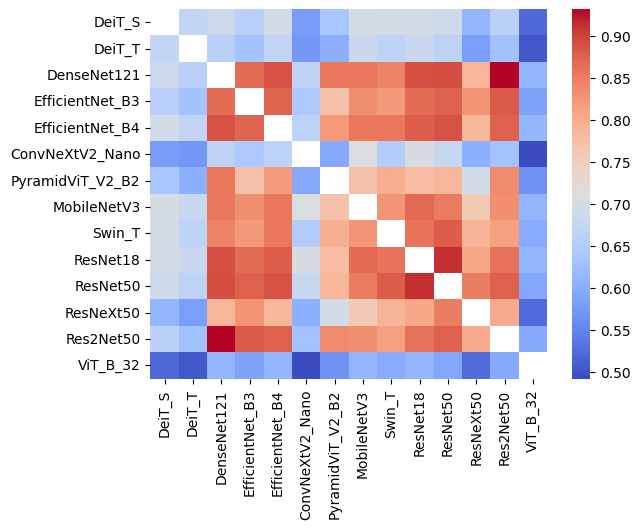

In [3]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [4]:
# PCA of distances
df_distances = 1 - df

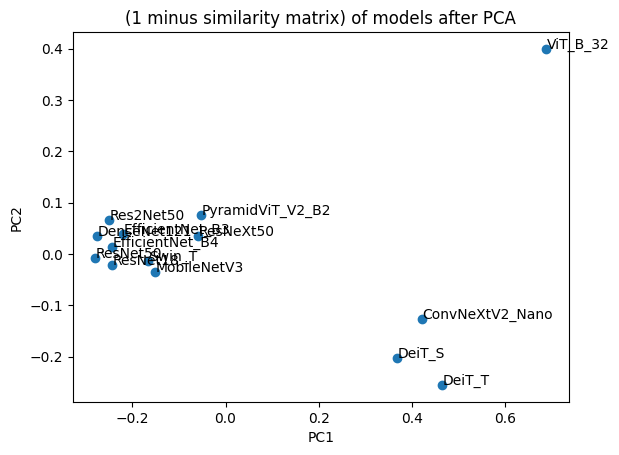

In [5]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.savefig('pca_cosine.png')
plt.show()

## Clustering

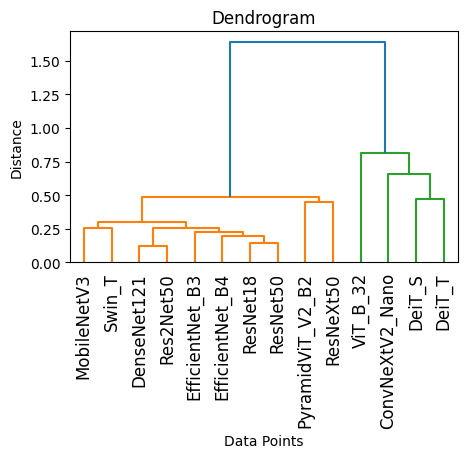

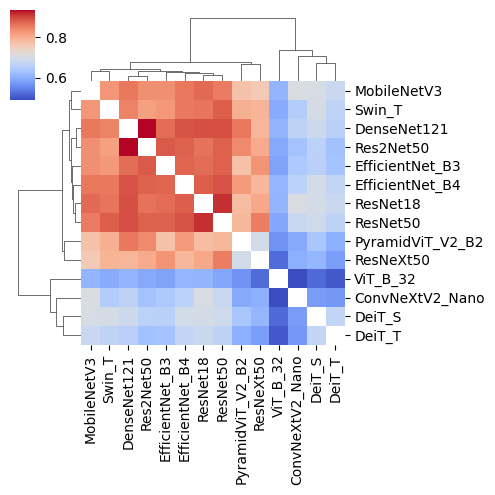

In [6]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


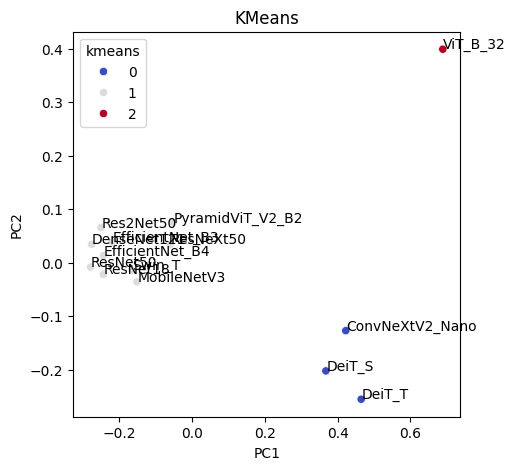

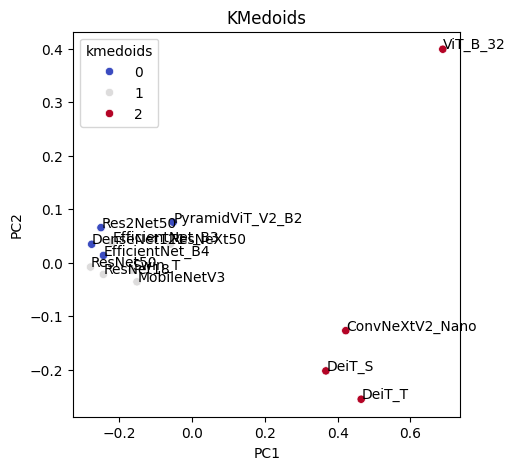

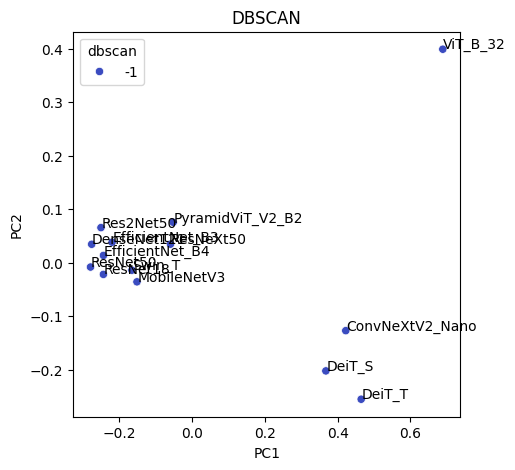

In [7]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()

# Analysis of similarity matrix - RBF

In [8]:
import pandas as pd

df = pd.read_csv('similarity_matrix_gradcam_rbf.csv', index_col=0)

## Heatmap

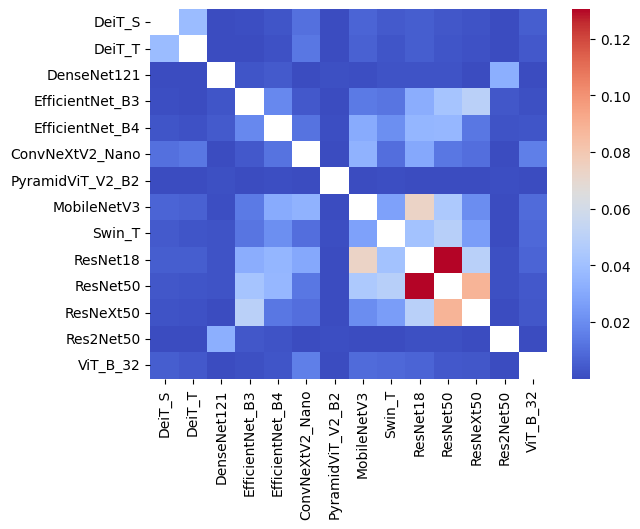

In [9]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [10]:
# PCA of distances
df_distances = 1 - df

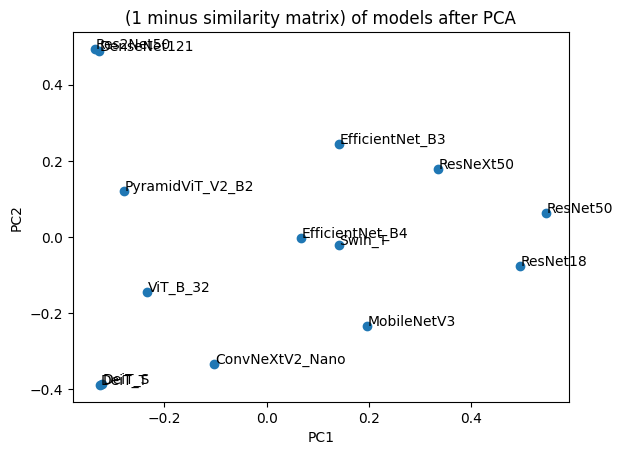

In [11]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.savefig('pca_rbf.png')
plt.show()

## Clustering

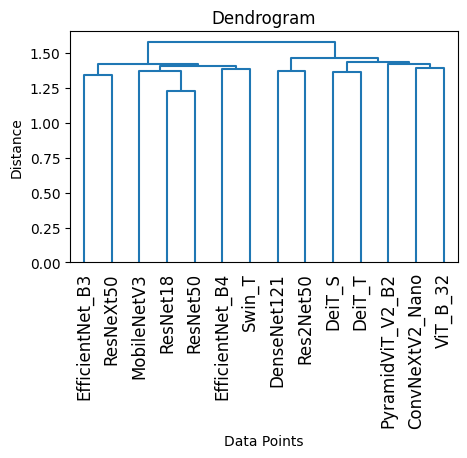

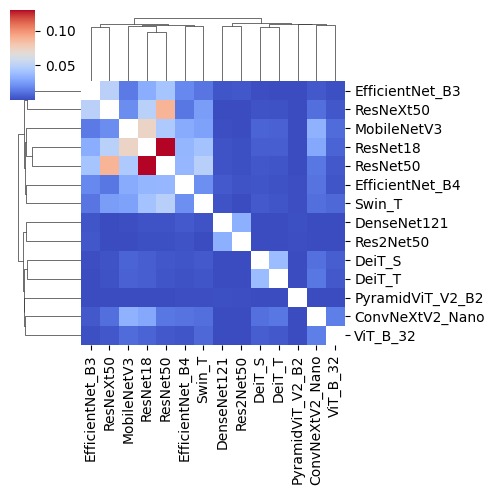

In [12]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


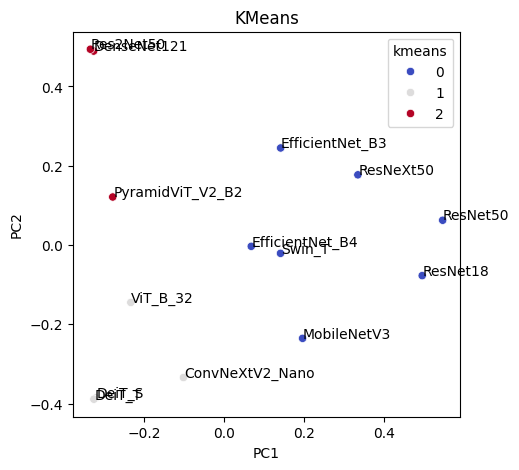

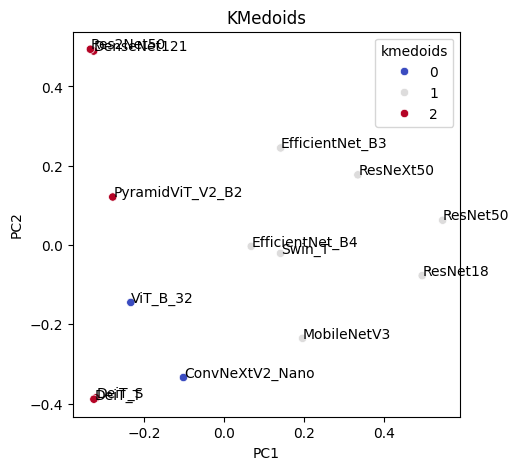

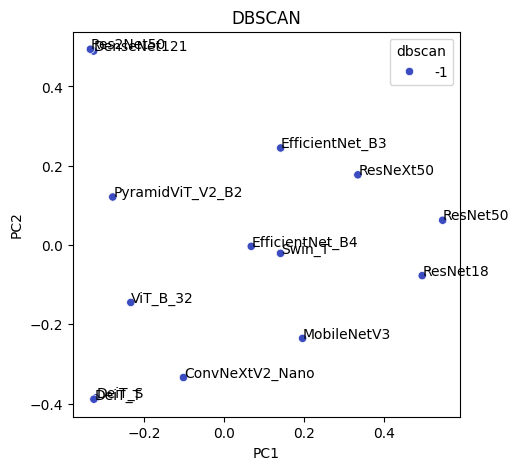

In [13]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()